In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
def align_time(*series):#First parameter must be crypto
    min_length = min([data.shape[0] for data in series])
    res = []
    for data in series:
        data = data.reindex(series[0].index, method='nearest')
        res.append(data)
    return [data[:min_length] for data in res]

In [3]:
def data_prep(filename, index):
    df = pd.read_csv(filename, sep=',', header=0, parse_dates=[0]) 
    df['time'] = pd.to_datetime(df['time'])
    stock_data = df.values
    ret = pd.Series(stock_data[:, index], index=df['time'])
    return ret

In [101]:
headers = ['time', 'close', 'volume', 'low', 'high', 'open']
btc = data_prep('BTC-USD.csv', 1)
goog = data_prep('GOOG.csv', 1)
aapl = data_prep('AAPL.csv', 1)
ixic = data_prep('^IXIC.csv', 1)
gspc = data_prep('^GSPC.csv', 1)
dji = data_prep('^DJI.csv', 1)
amd = data_prep('amd.csv', 1)
nvda = data_prep('nvda.csv', 1)
btc, goog, aapl, ixic, gspc, dji, amd, nvda = align_time(btc, goog, aapl, ixic, gspc, dji, amd, nvda)
X = pd.concat([goog, aapl, ixic, gspc, dji, amd, nvda], axis=1)
y = btc.rolling(10).mean().fillna(method='bfill')

In [110]:
from sklearn import linear_model
#lreg = linear_model.LinearRegression()
rreg = linear_model.Ridge(alpha=2e5)
#lareg = linear_model.Lasso()
#lreg.fit(X, y)
rreg.fit(X, y)
#lareg.fit(X, btc)
prediction = pd.Series(rreg.predict(X))

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

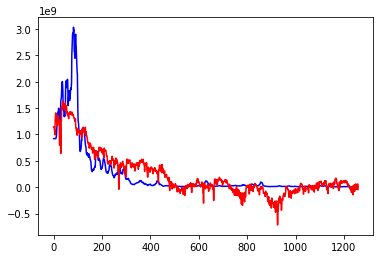

In [111]:
fig = plt.figure()
plt.plot(y.values, 'b-')
plt.plot(prediction, 'r-')
plt.show()